In [ ]:
import cv2
import matplotlib.pyplot as plt
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity,generateResultsSingleImage
import os
import re

base_dir = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/iphone'

for image_set_num in range(1,11):

    base_image_name = f'S{image_set_num}_Blank.DNG'
    base_image_path = os.path.join(base_dir, base_image_name)

    pattern = re.compile(rf'S{image_set_num}\D')
    # print(os.listdir(base_dir))
    matching_strings = [s for s in os.listdir(base_dir) if pattern.search(s)]

    for filename in matching_strings:

        image_path = os.path.join(base_dir, filename)

        results_dir = os.path.join('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/results',os.path.basename(base_dir))
        os.makedirs(results_dir, exist_ok=True)
        # base_image_path = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/android/S7_Blank.DNG'
        # image_path = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/iphone/S9_Height-1_10 mM_iphone_Yellow light.DNG'
        _ , metrics = generateResultsSingleImage(base_image_path, image_path, results_dir)
        pixels_changed = [metrics[i][0] for i in range(4)]
        intensity_change = [metrics[i][1] for i in range(4)]
        concentration = os.path.basename(image_path).split('_')[2].split()[0]
        sample_num = image_set_num
    # except:
    
        # print('NULL')

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity,generateResultsSingleImage
import os
import re

base_dir = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/iphone'

# Create an empty DataFrame with separate columns for each circle's data
data = {'image name': [], 'Concentration-val': [], 'Sample Number': []}
for i in range(4):
  data[f'Circle {i+1} Pixels Changed'] = []
  data[f'Intensity Change Circle {i+1}'] = []
df = pd.DataFrame(data)
cnt = 0
for image_set_num in range(1, 11):

    base_image_name = f'S{image_set_num}_Blank.DNG'
    base_image_path = os.path.join(base_dir, base_image_name)

    pattern = re.compile(rf'S{image_set_num}\D')
    matching_strings = [s for s in os.listdir(base_dir) if pattern.search(s)]

    for filename in matching_strings:

        image_path = os.path.join(base_dir, filename)

        results_dir = os.path.join('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/results',os.path.basename(base_dir))
        os.makedirs(results_dir, exist_ok=True)

        try:
            _, metrics = generateResultsSingleImage(base_image_path, image_path, results_dir)
            pixels_changed = [metrics[i][0] for i in range(4)]
            intensity_change = [metrics[i][1] for i in range(4)]
            concentration = os.path.basename(image_path).split('_')[2].split()[0]
            sample_num = image_set_num

            # Append results to the DataFrame
            df = df.append({'image name': filename, 
                             'Concentration-val': concentration, 'Sample Number': sample_num,
                             **dict(zip([f'Circle {i+1} Pixels Changed' for i in range(4)], pixels_changed)),
                             **dict(zip([f'Intensity Change Circle {i+1}' for i in range(4)], intensity_change))}, 
                              ignore_index=True)
        except:
            print(f'Error processing image: {filename}')
          
        cnt +=1
    # if(cnt<=10):
    #   break


# Print or save the DataFrame
print(df)
# df.to_csv('results.csv', index=False)


In [ ]:
df.to_csv('results.csv', index=False)
df['Sample Number'] = df['Sample Number'].astype(int)
df['Concentration-val'] = df['Concentration-val'].astype(int)
filtered_df = df[df['Concentration-val']==10]
print(filtered_df['Sample Number'].unique())

Concentration-val
0     [36.1803084223013, 37.11447212336892, 35.63167...
10    [35.78497962352028, 35.319231515621965, 35.176...
Name: Circle 1 Pixels Changed, dtype: object


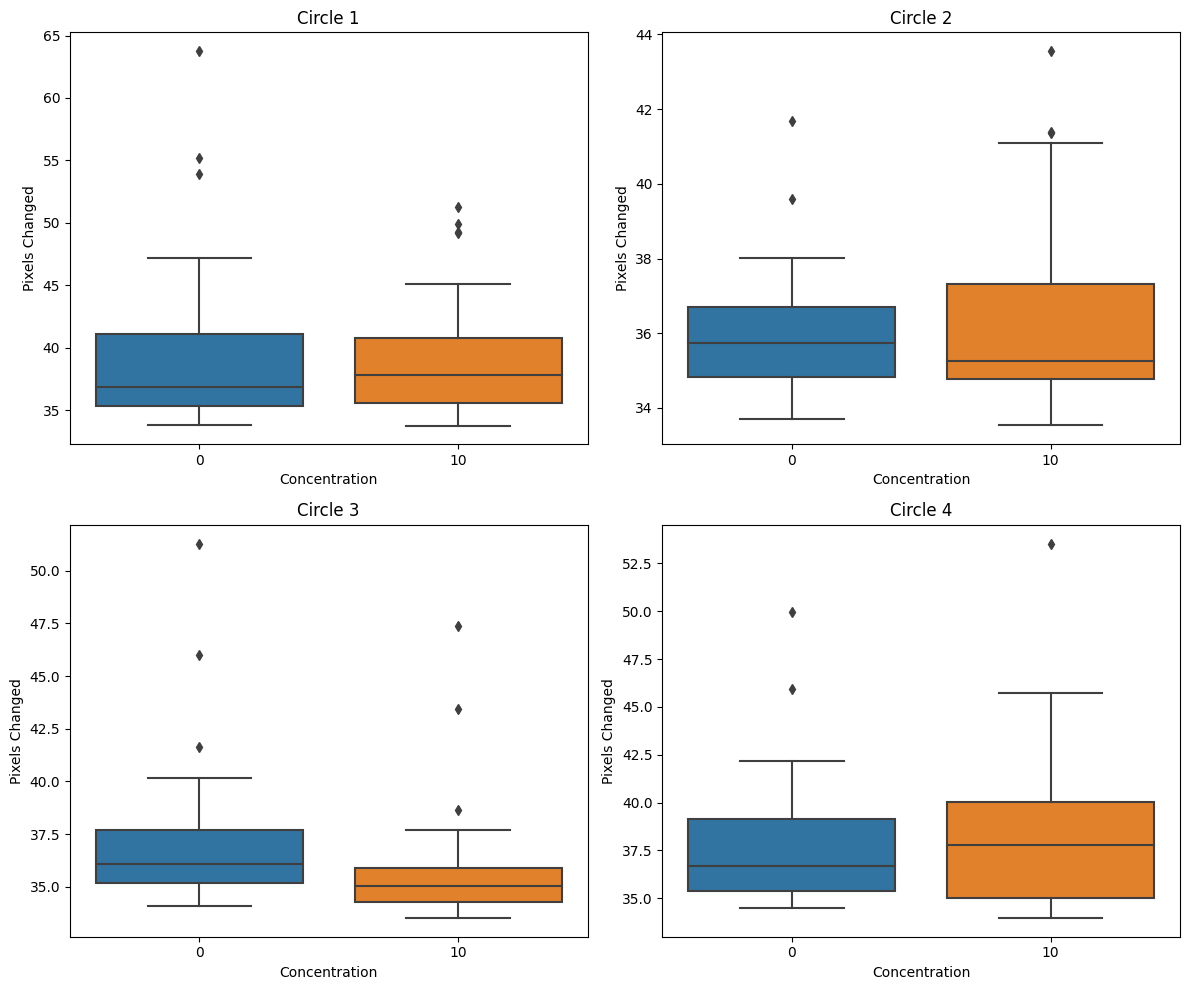

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sampleNumber = 6
filtered_df = df
# Grouping and Aggregation: Mean Pixels Changed by Concentration for each circle
mean_pixels_circle1 = filtered_df.groupby(['Concentration-val'])['Circle 1 Pixels Changed'].agg(list)
mean_pixels_circle2 = filtered_df.groupby(['Concentration-val'])['Circle 2 Pixels Changed'].agg(list)
mean_pixels_circle3 = filtered_df.groupby(['Concentration-val'])['Circle 3 Pixels Changed'].agg(list)
mean_pixels_circle4 = filtered_df.groupby(['Concentration-val'])['Circle 4 Pixels Changed'].agg(list)

print(mean_pixels_circle1)
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot boxplots for Circle 1
sns.boxplot(x='Concentration-val', y='Circle 1 Pixels Changed', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Circle 1')
axes[0, 0].set_xlabel('Concentration')
axes[0, 0].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 2
sns.boxplot(x='Concentration-val', y='Circle 2 Pixels Changed', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Circle 2')
axes[0, 1].set_xlabel('Concentration')
axes[0, 1].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 3
sns.boxplot(x='Concentration-val', y='Circle 3 Pixels Changed', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Circle 3')
axes[1, 0].set_xlabel('Concentration')
axes[1, 0].set_ylabel('Pixels Changed')

# Plot boxplots for Circle 4
sns.boxplot(x='Concentration-val', y='Circle 4 Pixels Changed', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Circle 4')
axes[1, 1].set_xlabel('Concentration')
axes[1, 1].set_ylabel('Pixels Changed')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Concentration-val
0     [66.04567022538552, 66.34489916963227, 63.8632...
10    [64.25648489553011, 61.209198525130994, 62.354...
Name: Intensity Change Circle 1, dtype: object


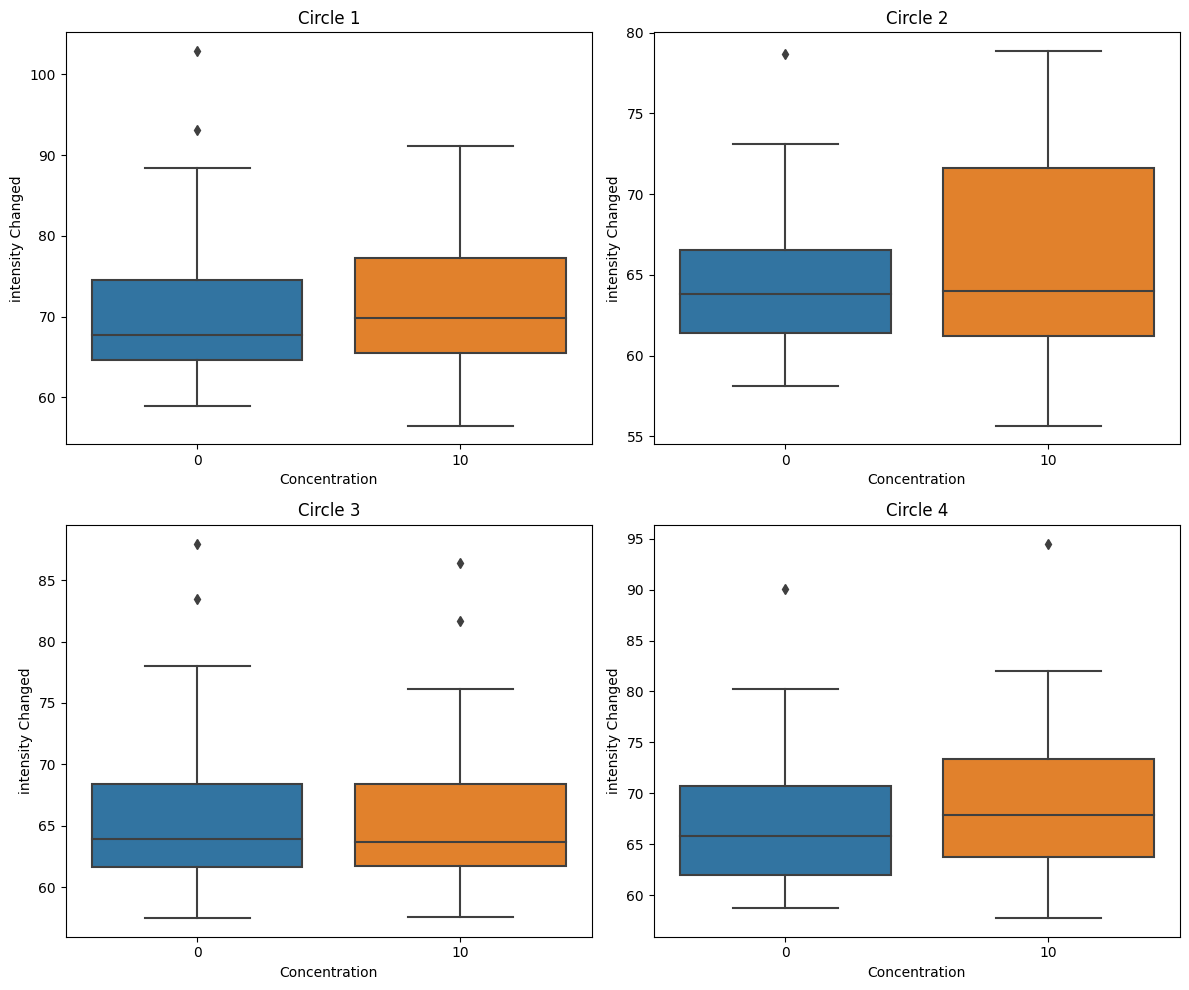

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sampleNumber = 6
filtered_df = df
# Grouping and Aggregation: Mean intensity Changed by Concentration for each circle
mean_intensity_circle1 = filtered_df.groupby(['Concentration-val'])['Intensity Change Circle 1'].agg(list)
mean_intensity_circle2 = filtered_df.groupby(['Concentration-val'])['Intensity Change Circle 2'].agg(list)
mean_intensity_circle3 = filtered_df.groupby(['Concentration-val'])['Intensity Change Circle 3'].agg(list)
mean_intensity_circle4 = filtered_df.groupby(['Concentration-val'])['Intensity Change Circle 4'].agg(list)


print(mean_intensity_circle1)
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot boxplots for Circle 1
sns.boxplot(x='Concentration-val', y='Intensity Change Circle 1', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Circle 1')
axes[0, 0].set_xlabel('Concentration')
axes[0, 0].set_ylabel('intensity Changed')

# Plot boxplots for Circle 2
sns.boxplot( x='Concentration-val', y='Intensity Change Circle 2',data=df, ax=axes[0, 1])
axes[0, 1].set_title('Circle 2')
axes[0, 1].set_xlabel('Concentration')
axes[0, 1].set_ylabel('intensity Changed')

# Plot boxplots for Circle 3
sns.boxplot(x='Concentration-val', y='Intensity Change Circle 3', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Circle 3')
axes[1, 0].set_xlabel('Concentration')
axes[1, 0].set_ylabel('intensity Changed')

# Plot boxplots for Circle 4
sns.boxplot(x='Concentration-val', y='Intensity Change Circle 4', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Circle 4')
axes[1, 1].set_xlabel('Concentration')
axes[1, 1].set_ylabel('intensity Changed')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


   Concentration-val                            Circle 1 Pixels Changed
0                  0  [36.1803084223013, 37.11447212336892, 35.63167...
1                 10  [35.78497962352028, 35.319231515621965, 35.176...


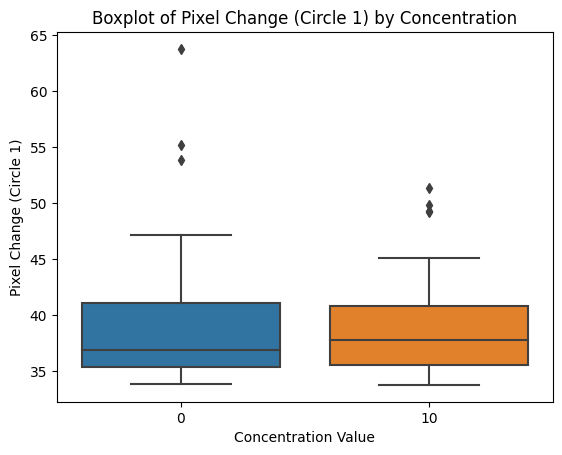

In [73]:
# filtered_df.groupby(['Concentration-val'])['Circle 1 Pixels Changed'].head()

grouped_data = filtered_df.groupby('Concentration-val')['Circle 1 Pixels Changed']
aggregated = grouped_data.agg(list).reset_index()
print(aggregated)
# # Create a new figure for the plot
plt.figure()

# Create the boxplot
sns.boxplot(x = 'Concentration-val', y = 'Circle 1 Pixels Changed', data=df)
plt.xlabel('Concentration Value')
plt.ylabel('Pixel Change (Circle 1)')
plt.title('Boxplot of Pixel Change (Circle 1) by Concentration')
plt.show()

In [ ]:
from image_utils import extracting_sensor_region, filter_blob_contours, filter_contours_by_centroids
import numpy as np
paddingFactor = 0.4
imFilename = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/android/S7_Blank.DNG'
image = cv2.imread(imFilename, cv2.IMREAD_COLOR)

x,y,w,h = extracting_sensor_region(image)
image = image[y:y+h, x:x+w]
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20, 150, 150])
upper_yellow = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

yellow_circles = cv2.bitwise_and(image, image, mask=closing)
gray = cv2.cvtColor(yellow_circles, cv2.COLOR_BGR2GRAY)

# Apply Difference of Gaussians (DoG) to enhance blob-like structures
sigma1 = 1.5
sigma2 = 3.0
ksize = int(2 * round(3 * sigma1) + 1)
blur1 = cv2.GaussianBlur(gray, (ksize, ksize), sigma1)
blur2 = cv2.GaussianBlur(gray, (ksize, ksize), sigma2)
dog = blur1 - blur2

threshold = 120
_, binary = cv2.threshold(dog, threshold, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(binary)
plt.title('Binary')
plt.show()
# _, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(yellow_circles, contours, -1, 255, 10)
print(len(contours))
plt.figure()
plt.imshow(yellow_circles)
plt.title('Contours')
plt.show()
if(len(contours)>4):
    cv2.drawContours(yellow_circles, contours, -1, 255, 10)
    # if (first_extract): 
    #     sensor_rect = extracting_sensor_region(image)
    #     contours = filter_contours_not_inside_sensor(contours, sensor_rect)
    # contours = filter_blob_contours(contours)
    # contours = filter_contours_by_centroids(contours)

    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Get the top four contours
    contours = sorted_contours[:4]

# for c in contours:
    # cv2.circle(image, (x, y), 2, (0, 255, 255), -1)
cv2.drawContours(image, contours, -1, 255, 10)
    

plt.figure()
plt.imshow(image)
plt.show()

threshold_area = 0
lower_yellow = np.array([15, 100, 80])
upper_yellow = np.array([45, 255, 255])

yellow_objects = []
x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
max_width = -1
areas = []
# TODO: Add validation check to eliminate noisy contours using geometry of the sensor
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 0:
        # print(area)
        mask = np.zeros_like(hsv[:,:,0], dtype=np.uint8)
        cv2.drawContours(mask, [contour], 0, 255, -1)
        mean_color = cv2.mean(hsv, mask=mask)[:3]  # HSV format

        if (lower_yellow <= mean_color).all() and (mean_color <= upper_yellow).all():
            areas.append(area)
            x, y, w, h = cv2.boundingRect(contour)
            max_width = max(max_width, max(w,h))
            x_min = min(x_min, x)
            y_min = min(y_min, y)
            x_max = max(x_max, x + w)
            y_max = max(y_max, y + h)
            M = cv2.moments(contour)
            centroid_x = int(M['m10'] / M['m00'])
            centroid_y = int(M['m01'] / M['m00'])
            yellow_objects.append((centroid_x, centroid_y, [contour]))
        else:
            print('hi')

print('yellow:', len(yellow_objects))
# for (x, y, c) in yellow_objects:
#     # cv2.circle(image, (x, y), 2, (0, 255, 255), -1)
#     cv2.drawContours(image, c, 0, 255, 10)
    

# plt.figure()
# plt.imshow(image)
# plt.show()


# print((x_max - x_min) * padding_ratio)
padding = int((x_max - x_min) * 0.9)
x_min = max(x_min - padding, 0)
y_min = max(y_min - padding, 0)
x_max = min(x_max + padding, image.shape[1])
y_max = min(y_max + padding, image.shape[0])

# square_region = image[y_min:y_max, x_min:x_max]


In [ ]:
len(os.listdir(base_dir))

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/android/S1_0 mM_Android_Angle 1_white light.jpg')

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask1 + mask2

blurred = cv2.GaussianBlur(mask, (9, 9), 2, 2)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

edges = cv2.Canny(mask, 50, 150, apertureSize=3)
# plt.figure()
# plt.imshow(edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)  
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1) 

# if lines is not None:
#     for rho, theta in lines[:, 0]:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         x1 = int(x0 + 1000 * (-b))
#         y1 = int(y0 + 1000 * (a))
#         x2 = int(x0 - 1000 * (-b))
#         y2 = int(y0 - 1000 * (a))
#         cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
Rectangle = namedtuple('Rectangle', 'x1 y1 x2 y2')

# Load image
image = cv2.imread('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/android/S1_0 mM_Android_Angle 1_white light.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (13,13), 0)

# Apply thresholding
ret, thresh1 = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(thresh1, cmap='gray')

cnts = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

height, width = image.shape[:2]

def is_contour_touching_edge(contour, width, height):
    for point in contour:
        if point[0][0] <= 0 or point[0][1] <= 0 or point[0][0] >= width - 1 or point[0][1] >= height - 1:
            return True
    return False

def is_middle(contour, width, height):
    x, y, w, h = cv2.boundingRect(contour)
    xmargin = width * 0.2
    ymargin = height * 0.2
    ra = Rectangle(x,y, x+w, y+h)
    rb = Rectangle(xmargin,ymargin, width- xmargin, height - ymargin)
    overlap_area = 0
    def area (a,b):
        dx = min(a.x2, b.x2) - max(a.x1, b.x1)
        dy = min(a.y2, b.y2) - max(a.y1, b.y1)
        if (dx>=0) and (dy>=0):
            return dx * dy
        return 0
    # print(overlap_area, w*h*0.7)
    overlap_area = area(ra, rb)
    if overlap_area < w*h * 0.7:
        return False
    return True

bbs = []
for c in cnts:
    if not is_contour_touching_edge(c, width, height) and  is_middle(c, width, height):
        area = cv2.contourArea(c)
        if area > 200:
            expansionFactor = 0.3
            x, y, w, h = cv2.boundingRect(c)
            # expand bounding box
            x = x - (w * expansionFactor)
            y = y - (h * expansionFactor)
            w = w + (w * 2 * expansionFactor)
            h = h + (h * 2 * expansionFactor)
            # make sure bounding box is within frame
            x = max(int(x), 0)
            y = max(int(y), 0)
            w = min(int(w), width - x)
            h = min(int(h), height - y)
            bbs.append((x,y,w,h))
            cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 3)

# Currently taking the largest bounding box but need to update to such that it takes the largest box with maximum number of bounding 
# boxes in it.
bbs_sorted = sorted(bbs, key=lambda bb: bb[2]*bb[3],reverse=True)
final_bb = bbs_sorted[0]
x,y,w,h = final_bb
cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 12), 3)

plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
print(bbs_sorted[0])


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/iphone/S1_Height-1_0 mM_iphone_Yellow light.DNG')


# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Draw lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with detected lines
plt.imshow(gray)
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/iphone/S1_Height-1_0 mM_iphone_Yellow light.DNG')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 150, 160, apertureSize=3)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.figure()
plt.imshow(edges)

# Draw contours on the original image
# cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# Hough Line Transform
lines = cv2.HoughLines(edges, 1.5, np.pi / 180, 200)

# Iterate through each detected line
for line in lines:
    rho, theta = line[0]
    # Convert polar coordinates to Cartesian coordinates
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    # Draw lines on the original image
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)


# Display the image with contours drawn
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
